# Assignment Week 2 

* Answer each question completely. 
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [2]:
missing_values = df.isna().sum()
print(f"Number of missing values in each column: \n{missing_values}")

Number of missing values in each column: 
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


Here, we see that there are quite a few missing values in make, model, trim, body, transmition, and transmission, with the highest number of missing values residing in the transmission column.

## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [3]:
df.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


In [5]:
df['mmr']

0         20500
1         20800
2         31900
3         27500
4         66000
          ...  
558832    35300
558833    30200
558834    29800
558835    15100
558836    29600
Name: mmr, Length: 558837, dtype: object

In [6]:
df['mmr'] = pd.to_numeric(df['mmr'], errors = 'coerce')
df['sellingprice'] = df['sellingprice'].astype(float)
df['saledate'] = pd.to_datetime(df['saledate'], format='ISO8601', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          558837 non-null  int64         
 1   make          548536 non-null  object        
 2   model         548438 non-null  object        
 3   trim          548186 non-null  object        
 4   body          545642 non-null  object        
 5   transmission  493484 non-null  object        
 6   vin           558833 non-null  object        
 7   state         558837 non-null  object        
 8   condition     547043 non-null  object        
 9   odometer      558743 non-null  float64       
 10  color         558088 non-null  object        
 11  interior      558088 non-null  object        
 12  seller        558837 non-null  object        
 13  mmr           558811 non-null  float64       
 14  sellingprice  558837 non-null  float64       
 15  saledate      0 n

The two columns that had incorrect data types were the mmr and the saledate, which were both originally object types. They were then corrected to int64 and datetime64[ns], respectively. The string-looking dtypes are correct to be stored as object dtypes, as the strings have variable lengths and pandas assigns them to "pointer" objects as a result. Reference: https://stackoverflow.com/questions/21018654/strings-in-a-dataframe-but-dtype-is-object 

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [7]:
df.make

0            Kia
1            Kia
2            BMW
3          Volvo
4            BMW
           ...  
558832       Kia
558833       Ram
558834       BMW
558835    Nissan
558836      Ford
Name: make, Length: 558837, dtype: object

In [8]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['acura',
 'acura',
 'airstream',
 'aston martin',
 'audi',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc',
 'gmc truck',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'kia',
 'lamborghini',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'lincoln',
 'lotus',
 'maserati',
 'maserati',
 'mazda',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nan',
 'nissan',
 'nissan',
 'oldsmobile',
 'oldsmobile',
 'plymouth',
 'plymouth',
 'pontiac',
 'pontiac',
 'porsche',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 's

From the list, it appears that there are some repeating makes, due to some being capitalized and others not. Some of the same brands are also abbreviated. To reduce the number of uniques, the makes will all have to be made lower case

In [9]:
df['make'] = df['make'].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [10]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['acura',
 'airstream',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc truck',
 'honda',
 'hummer',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lamborghini',
 'land rover',
 'landrover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 'nan',
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo',
 'vw']

There are still some modifications that can be made to clean the data better. Namely, change "tk" to "truck", "mercedes-benz" or "mercedes-b" to "mercedes", "land rover" to "landrover" and "vw" to "volkswagen"

In [11]:
df['make'] = df['make'].apply(lambda x: x.replace('tk', 'truck') if isinstance(x, str) else x)
df['make'] = df['make'].apply(lambda x: x.replace('-benz', '-b') if isinstance(x, str) else x)
df['make'] = df['make'].apply(lambda x: x.replace('mercedes-b', 'mercedes') if isinstance(x, str) else x)
df['make'] = df['make'].apply(lambda x: x.replace('land rover', 'landrover') if isinstance(x, str) else x)
df['make'] = df['make'].apply(lambda x: x.replace('vw', 'volkswagen') if isinstance(x, str) else x)

In [12]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['acura',
 'airstream',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge truck',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford truck',
 'geo',
 'gmc',
 'gmc truck',
 'honda',
 'hummer',
 'hyundai',
 'hyundai truck',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lamborghini',
 'landrover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mazda truck',
 'mercedes',
 'mercury',
 'mini',
 'mitsubishi',
 'nan',
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo']

Now every distinguishable make has been consolidated

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [13]:
# Reference: https://realpython.com/numpy-scipy-pandas-correlation-python/, 
# https://stackoverflow.com/questions/62115245/why-does-numpy-corrcoef-returns-nan

# To prevent correlation coefficient from returning NaN, replace any inf in x or y and drop the row
# in respect with just MMR and selling price
x = df.mmr.replace([np.inf, -np.inf], np.nan)
y = df.sellingprice.replace([np.inf, -np.inf], np.nan)
MMR_sellingprice = pd.concat([x, y], axis = 1)
MMR_sellingprice = MMR_sellingprice.dropna(how='any')
x = MMR_sellingprice.mmr
y = MMR_sellingprice.sellingprice

r = np.corrcoef(x,y)[0, 1]
print('Overall correlation: \n', r)

Overall correlation: 
 0.9836337168977236


In [14]:
print('Maximum MMR and selling prices: ')
print(MMR_sellingprice.max())

Maximum MMR and selling prices: 
mmr             182000.0
sellingprice    230000.0
dtype: float64


In [15]:
print('Price windows: ')
price_window = np.arange(1000, 240000, 10000)
print(price_window)
corr_by_price_window = []
for price in price_window:
    x = MMR_sellingprice[MMR_sellingprice['sellingprice'] <= price]['mmr']
    y = MMR_sellingprice[MMR_sellingprice['sellingprice'] <= price]['sellingprice']
    r = np.corrcoef(x,y)[0, 1]
    corr_by_price_window.append(r)
print('Price window correlations: ')
print(corr_by_price_window)

Price windows: 
[  1000  11000  21000  31000  41000  51000  61000  71000  81000  91000
 101000 111000 121000 131000 141000 151000 161000 171000 181000 191000
 201000 211000 221000 231000]
Price window correlations: 
[0.18870734002338604, 0.894915584617116, 0.9611119088888257, 0.9751492362694788, 0.9794201044000891, 0.9814044662293483, 0.9822906825621875, 0.9827394870383862, 0.9832265013322614, 0.983449062910152, 0.9835846878133764, 0.9835954841216811, 0.9836759581028226, 0.983758345952282, 0.9838283831459205, 0.9838873814578423, 0.9839638593541457, 0.9840077311787891, 0.9840226043763741, 0.9840312414363489, 0.9840312414363489, 0.9840312414363489, 0.9840312414363489, 0.9836337168977236]


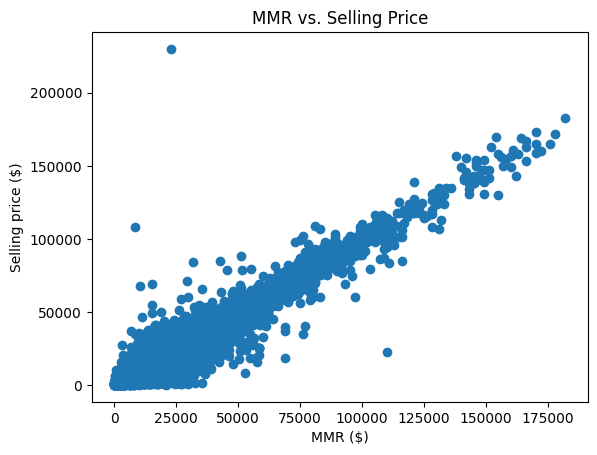

In [16]:
x = MMR_sellingprice.mmr
y = MMR_sellingprice.sellingprice
plt.scatter(x,y)
plt.title('MMR vs. Selling Price')
plt.xlabel('MMR ($)')
plt.ylabel('Selling price ($)')
plt.show()

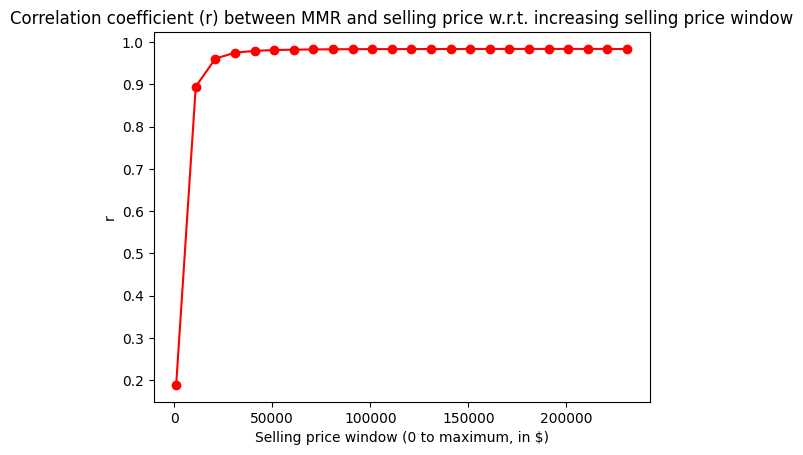

In [17]:
plt.plot(price_window, corr_by_price_window, '-ro')
plt.title('Correlation coefficient (r) between MMR and selling price w.r.t. increasing selling price window')
plt.xlabel('Selling price window (0 to maximum, in $)')
plt.ylabel('r')
plt.show()

From the data shown there is a strong correlation between the MMR and the selling price, as evident by r = 0.98. This is confirmed by the scatter plot shown above. When zooming in on the pricing windown from 0 to 10,000 and subsequent increases by 10,000 to the maximum, the correlation coefficient appears to increase abruptly before stablizing at around 0.98. This is a good sign that buyers are being charged fairly for what the value of the car is.

## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

In [18]:
#10 most common makes from 2010-2015
df_2010_2015 = df[(df['year'] >= 2010) | (df['year']) <= 2015]
top_10_makes = df_2010_2015.groupby('make').make.count().sort_values(ascending=False).index[0:10]

In [19]:
df_2010_2015_top_10_makes = df_2010_2015[df_2010_2015['make'].isin(top_10_makes)]

In [20]:
sellingpricedist = df_2010_2015_top_10_makes[['make', 'sellingprice']]

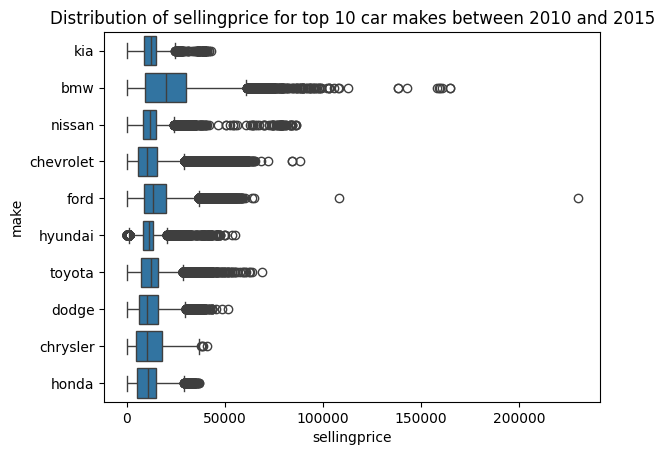

In [21]:
sns.boxplot(sellingpricedist, x = 'sellingprice', y = 'make')
plt.title('Distribution of sellingprice for top 10 car makes between 2010 and 2015')
plt.show()

As shown from the boxplot above, most cars that were sold between 2010 and 2015 were sold with a price between 0 and 100,000. However, there were a few vehicles that were sold for much more than that, namely a ford vehicle that was sold for over 200,000. Aside from that extreme outlier, the BMW appears to have the largest distribution of prices from 2010 to 2015, while the hyundai seems to have the smallest distribution of prices.